In [9]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 3)

import pywt

sys.path.append("../wavelet_functions")
from dan_wavelets import dwt, idwt

In [2]:
signal = pd.read_csv("../datasets/ibm_returns.csv", header=None, index_col=0, names=["returns"]).squeeze()

In [3]:
signal = np.abs(signal)

In [6]:
num_decompositions = 4

In [7]:
decomposition = [None]*(num_decompositions+1)
cA = signal
for i in range(num_decompositions-1):
    cD, cA = dwt(cA)
    decomposition[num_decompositions-i] = cD
decomposition[0] = cA

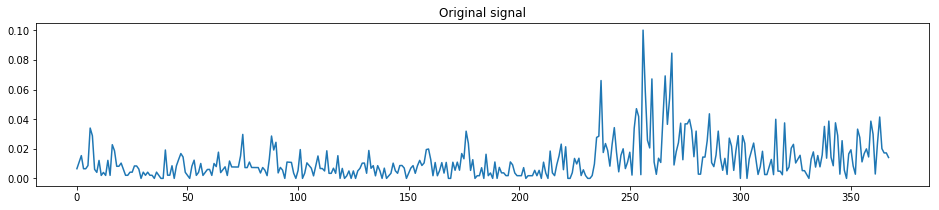

Iterations:  1


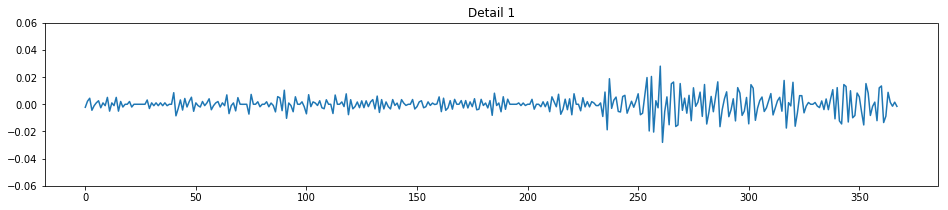

Iterations:  2


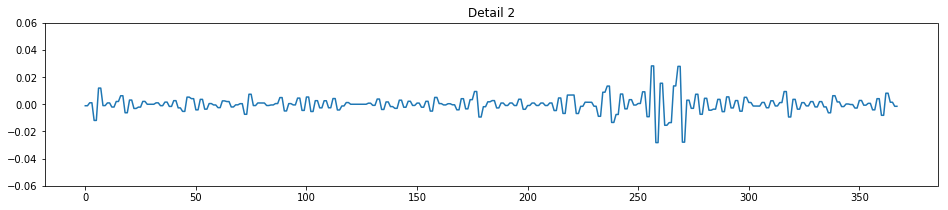

Iterations:  3


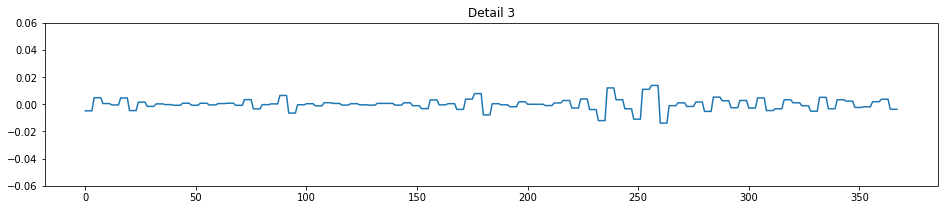

Iterations:  4


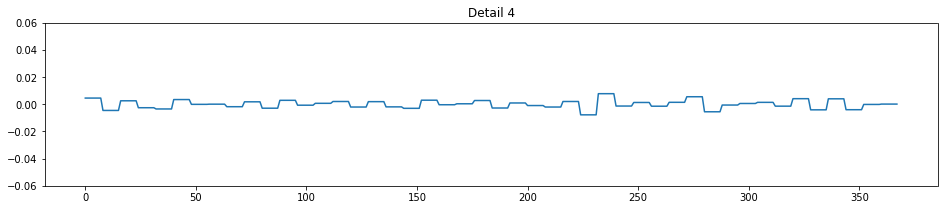

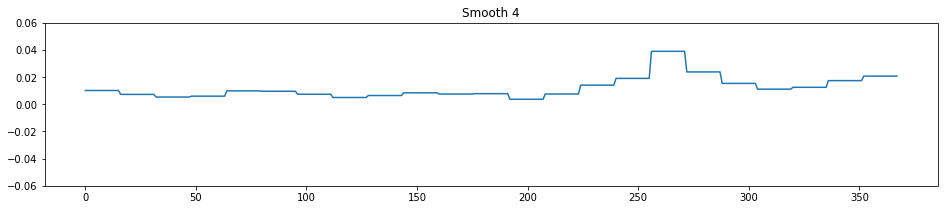

In [10]:

decomposition = pywt.wavedec(signal, wavelet, level=num_decompositions)

y_min = -0.06
y_max = 0.06

plt.title("Original signal")
plt.plot(signal)
plt.show()

for i in range(num_decompositions, 0, -1):
    level = num_decompositions+1-i
    axes = plt.gca()
    axes.set_ylim([y_min,y_max])
    plt.title("Detail "+str(level))
    d = decomposition[i]
    #d = pywt.upcoef("d", d, wavelet, num_decompositions+1-i, signal.shape[0])
    print("Iterations: ", num_decompositions+1-i)
    d = idwt(d, np.zeros(d.shape), level = 1)
    for i in range(level-1):
        d = idwt(np.zeros(d.shape), d, level = 1)
    plt.plot(d)
    plt.show()
    
a = decomposition[0]
for i in range(num_decompositions):
    a = idwt(np.zeros(a.shape), a)
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.title("Smooth " + str(num_decompositions))
plt.plot(a)
plt.show()